In [1]:
import sys
import os
sys.path.insert(0, r"D:\2022\automapic\AutoMapic\Automapic\scripts")

In [2]:
import arcpy
import json
import MG_S00_model as model
import pandas as pd


def featureTable_to_dataFrame(table, query="#"):
    cursor = arcpy.da.SearchCursor(table, ["*"], query)
    fields = arcpy.ListFields(table)
    data = list()
    for i in cursor:
        row = dict()
        for idx, field in enumerate(fields):
            row[field.name] = i[idx]
        data.append(row)
    df = pd.DataFrame(data)
    return df

In [3]:
codhoja = '29r4'

tb_leyenda = model.tb_dgr_leyenda()
query = "{} = '{}' and {} = 1".format(tb_leyenda.codhoja, codhoja, tb_leyenda.estado)
df_leyenda = featureTable_to_dataFrame(tb_leyenda.path, query)

tb_edades = model.tb_edades()
df_edades = featureTable_to_dataFrame(tb_edades.path)

In [4]:
df_leyenda.head()

,CODHOJA,CODI,CODIUNIHOJA,DESCRIP,EDAD,ESTADO,ETIQUETA,GROSOR_I,GROSOR_M,GROSOR_U,OBJECTID,ORDEN,SEP,SERIE,TIPO,UNIDAD
0,29r4,3552,3,Calizas micríticas masivas con grosores hasta ...,None,1,None,<Null>,None,500,76,1,None,1332,1,Fm. Arcurquina
1,29r4,2941,3,Intercalación de areniscas laminares de color ...,None,1,Jm-ca3,250,None,500,77,10,None,1121,1,Fm. Málaga
2,29r4,2905,3,A la base: lutitas carbonosas intercaladas con...,None,1,Js-g3,125,None,500,78,3,None,1332,1,Fm. Arcurquina
3,29r4,2907,2,"Areniscas cuarzofeldespáticas con limoarenas, ...",None,1,Js-l3,1000,None,750,79,15,None,1114,1,Grupo Ollantaytambo
4,29r4,2479,3,Calizas micríticas masivas con grosores hasta ...,None,1,Ki-a/i4,100,None,500,80,2,None,1332,1,Fm. Arcurquina


In [5]:
df_1 = df_leyenda[df_leyenda['TIPO'] == '1']
df_2 = df_leyenda[df_leyenda['TIPO'] == '2']

In [6]:
df_1.sort(["ORDEN"], ascending=False, inplace=True)

C:\Users\proyectososi01\AppData\Roaming\Python\Python27\site-packages\pandas\core\frame.py:2909: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


In [7]:
df_1.head()

,CODHOJA,CODI,CODIUNIHOJA,DESCRIP,EDAD,ESTADO,ETIQUETA,GROSOR_I,GROSOR_M,GROSOR_U,OBJECTID,ORDEN,SEP,SERIE,TIPO,UNIDAD
3,29r4,2907,2,"Areniscas cuarzofeldespáticas con limoarenas, ...",None,1,Js-l3,1000,None,750,79,15,None,1114,1,Grupo Ollantaytambo
5,29r4,2491,1,Parte inferior: Areniscas blancas cuarzosas de...,None,1,Ki-hu3,525,None,525,81,14,None,1121,1,Grupo Ollantaytambo
7,29r4,2480,3,Calizas en estratos submétricos intercaladas c...,None,1,Ks-a/m4,400,None,750,83,13,None,1121,1,Fm. Veronica
12,29r4,687,3,"Toba soldada de cristales de biotita, plagiocl...",None,1,NQ-malE1,300,None,300,88,12,None,1121,1,Fm. Málaga
6,29r4,2501,3,A la base: intercalación de areniscas pardo ro...,None,1,Ki-mu3,300,None,500,82,11,None,1121,1,Fm. Málaga


In [8]:
x_ini = 0
y_ini = 0

In [9]:
def get_grosor(row):
    if row['GROSOR_U']:
        return row['GROSOR_U']
    elif row['GROSOR_M']:
        return row['GROSOR_M']
    elif row['GROSOR_I']:
        return row['GROSOR_I']

In [10]:
# Calcular la altura total
df_1['GROSOR'] = df_1.apply(lambda i: get_grosor(i), axis=1)

C:\Users\proyectososi01\AppData\Roaming\Python\Python27\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
factor = 1
h_upper_separator = 125
h_lower_separator = 125
h_separator = 125
h_header = 700
h_re = 300
h_re_sub = 400
w_eratema = 250
w_sistema = 250
w_serie = 250
w_space = 100
w_unidad = 350
w_re_diagrama = 1000
w_re_descripcion = 3275
w_re_descripcion_space = 100
w_rne_re_diagrama = 1000
w_rne_descripcion = 3275

# coordenadas
x_ini = 0
y_ini = 0
x_ini_eratema = x_ini
x_ini_sistema = x_ini_eratema + w_eratema
x_ini_serie = x_ini_sistema + w_sistema
x_ini_space = x_ini_serie + w_serie
x_ini_unidad = x_ini_space + w_space
x_ini_diagrama = x_ini_unidad + w_unidad
x_ini_descripcion = x_ini_diagrama + w_re_diagrama
x_ini_descripcion_label = x_ini_diagrama + w_re_diagrama + w_re_descripcion_space

tipo = {
    'eratema': 1,
    'sistema': 2,
    'serie': 3,
    'unidad': 4,
    'diagrama': 5,
    'descripcion': 6,
    'header_eratema': 7,
    'header_sistema': 8,
    'header_serie': 9,
    'header_unidad': 10,
    'header_diagrama': 11,
    'header_descripcion': 12,
    'header_rocas_estratificadas': 13,
    'header_rocas_no estratificadas': 14,
    'header_edad': 15,
    'auxiliar': 16
}

In [12]:
h_total = sum(map(lambda i: factor * i, df_1['GROSOR'].tolist())) + len(df_1[df_1['SEP'] == '1'])* h_separator + h_lower_separator + h_upper_separator + h_header

In [13]:
df_1.reset_index(inplace=True, drop=True)

In [14]:
h_current = y_ini + h_lower_separator
h_unidad, h_unidad_ini = h_current, h_current
h_current

125

In [15]:
from shapely.geometry import Polygon
from shapely import ops
import matplotlib.pyplot as plt

In [16]:
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [17]:
def generate_diagram(row):
    global h_current
    codi = row['CODI']
    etiqueta = row['ETIQUETA']
    x_min = x_ini_diagrama
    y_min = h_current
    x_max = x_ini_diagrama + w_re_diagrama
    y_max = h_current + row['GROSOR'] * factor
    coords = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)]
    plg = Polygon(coords)
    h_current = y_max
    return {'codi': codi, 'nombre': etiqueta, 'polygon': plg, 'y_max': y_max, 'height': y_max - y_min, 'tipo': tipo['diagrama']}

In [18]:

# df_1[df_1['ETIQUETA'] == 'Tms-m']['DESCRIP'].iloc[0]


In [19]:
def generate_label(pol):
    _, y_ctr = pol['polygon'].centroid.xy
    x, y = x_ini_descripcion_label, y_ctr[0]
    description = df_1[df_1['CODI'] == pol['codi']]['DESCRIP'].iloc[0]
    description = set_detalle(description, 60)
    return {'nombre': description, 'etiqueta': pol['nombre'], 'x': x, 'y': y, 'tipo': tipo['descripcion'], 'rotation': 0, 'horizontalalignment': 'left'}

In [20]:
def generate_serie(h, y_max):
    y_min = y_max - h
    coords = [(x_ini_serie, y_min), (x_ini_serie, y_max), (x_ini_space, y_max), (x_ini_space, y_min)]
    plg = Polygon(coords)
    return plg

In [21]:
def generate_unidad(h, y_max):
    y_min = y_max - h
    coords = [(x_ini_unidad, y_min), (x_ini_unidad, y_max), (x_ini_diagrama, y_max), (x_ini_diagrama, y_min)]
    plg = Polygon(coords)
    return plg

In [22]:
def generate_sistema(array_serie):
    id_sistema = array_serie[0]['id_edad'][:3]
    nombre_sistema = df_edades[df_edades['ID_EDAD'] == id_sistema]['NOMBRE'].item()
    y_min = array_serie[0]['polygon'].bounds[1]
    y_max = array_serie[-1]['polygon'].bounds[-1]
    coords = [(x_ini_sistema, y_min), (x_ini_sistema, y_max), (x_ini_serie, y_max), (x_ini_serie, y_min)]
    plg = Polygon(coords)
    return {"id_edad": id_sistema, "nombre": nombre_sistema, 'polygon': plg, 'tipo': tipo['sistema']}

In [23]:
def generate_eratema(array_serie):
    id_eratema = array_serie[0]['id_edad'][:2]
    nombre_eratema = df_edades[df_edades['ID_EDAD'] == id_eratema]['NOMBRE'].item()
    y_min = array_serie[0]['polygon'].bounds[1]
    y_max = array_serie[-1]['polygon'].bounds[-1]
    coords = [(x_ini_eratema, y_min), (x_ini_eratema, y_max), (x_ini_sistema, y_max), (x_ini_sistema, y_min)]
    plg = Polygon(coords)
    return {"id_edad": id_eratema, "nombre": nombre_eratema, 'polygon': plg, 'tipo': tipo['eratema']}

In [24]:
def set_detalle(text, max_character_by_line, first_line=False, sep='\n'):
    if len(text) <= max_character_by_line:
        return text
    nlist = list()
    textList = text.split(' ')
    ini, end, tx = 0, 0, str()
    for i, t in enumerate(textList, 1):
        tx = ' '.join(textList[ini:i])
        if len(tx) > max_character_by_line:
            end = i - 1
            tx = ' '.join(textList[ini:end])
            nlist.append(tx)
            ini = end
    nlist.append(' '.join(textList[end:]))
    if first_line:
        return nlist[0] + sep + ' '.join(nlist[1:])
    return sep.join(nlist)

In [25]:
diagrama_arr = list()

unidad = None
unidad_arr = list()
diagrama_arr_h_unidad = list()

serie = None
serie_arr =list()
diagrama_arr_h_serie = list()
serie_first = 1

etiquetas_arr = list()

for i, row in df_1.iterrows():
    if not serie:
        serie = row['SERIE']
    if serie != row['SERIE'] or i == len(df_1) - 1:
        # Construir poligono de serie
        y_max_serie = diagrama_arr[-1]['y_max']
        if serie_first == 1:
            diagrama_arr_h_serie.append(h_upper_separator)
            serie_first = 0
        if i == len(df_1) - 1:
            y_max_serie = y_max_serie + row['GROSOR'] + h_upper_separator
            diagrama_arr_h_serie.append(row['GROSOR'])
            diagrama_arr_h_serie.append(h_upper_separator)
        serie_pol = generate_serie(sum(diagrama_arr_h_serie), y_max_serie)
        nombre_serie = df_edades[df_edades['ID_EDAD'] == serie]['NOMBRE'].item()
        serie_arr.append({'id_edad': serie, 'nombre': nombre_serie, 'polygon': serie_pol, 'tipo': tipo['serie']})
        serie = row['SERIE']
        diagrama_arr_h_serie = []
    if not unidad:
        unidad = row['UNIDAD']
    if unidad != row['UNIDAD'] or i == len(df_1) - 1:
        # Construir poligono de unidad
        y_max_unidad = diagrama_arr[-1]['y_max']
        if i == len(df_1) - 1:
            y_max_unidad = y_max_unidad + row['GROSOR']
            diagrama_arr_h_unidad.append(row['GROSOR'])
        unidad_pol = generate_unidad(sum(diagrama_arr_h_unidad), y_max_unidad)
        unidad_arr.append({'nombre': unidad, 'polygon': unidad_pol, 'tipo': tipo['unidad']})
        unidad = row['UNIDAD']
        diagrama_arr_h_unidad = []
    # Construir poligono de diagrama
    pol = generate_diagram(row)
    diagrama_arr.append(pol)
    lab = generate_label(pol)
    etiquetas_arr.append(lab)
    diagrama_arr_h_unidad.append(pol['height'])
    diagrama_arr_h_serie.append(pol['height'])
    if row['SEP'] == '1':
        h_current = h_current + h_separator


In [26]:
df_mergin = df_1.groupby(by='ETIQUETA').size().reset_index(name="count")
df_mergin = df_mergin[df_mergin['count'] == 2]

In [27]:
df_mergin

,ETIQUETA,count
9,Np-viE2,2
11,Tms-m,2


In [28]:
for idx, row in df_mergin.iterrows():
    elms = [(i, pol) for i, pol in enumerate(diagrama_arr) if pol['nombre'] == row['ETIQUETA']]
    elms_etiqueta = [(i, pol) for i, pol in enumerate(etiquetas_arr) if pol['etiqueta'] == row['ETIQUETA']]
    elm_first = elms[0]
    elm_first_etiqueta = elms_etiqueta[0]
    new_pol = ops.cascaded_union([pol[1]['polygon'] for pol in elms])
    elm_first[1]['polygon'] = new_pol

    new_row = generate_label(elm_first[1])

    diagrama_arr = filter(lambda pol: pol['nombre'] != row['ETIQUETA'], diagrama_arr)
    diagrama_arr.insert(elm_first[0], elm_first[1])

    etiquetas_arr = filter(lambda pol: pol['etiqueta'] != row['ETIQUETA'], etiquetas_arr)
    etiquetas_arr.insert(elm_first_etiqueta[0], new_row)


In [29]:
# Construir poligono de sistema
sistema_arr_unique = set(map(lambda i:i['id_edad'][:3], serie_arr))
sistema_arr = list()

for sistema in sistema_arr_unique:
    array_serie = filter(lambda i: i['id_edad'].startswith(sistema), serie_arr)
    pol_sistema = generate_sistema(array_serie)
    sistema_arr.append(pol_sistema)

# Construir poligono de eratema
eratema_arr_unique = set(map(lambda i:i['id_edad'][:2], serie_arr))
eratema_arr = list()

for eratema in eratema_arr_unique:
    array_serie = filter(lambda i: i['id_edad'].startswith(eratema), serie_arr)
    pol_eratema = generate_eratema(array_serie)
    eratema_arr.append(pol_eratema)
    # break

In [30]:
# Header
auxiliares_arr = list()
y_min_aux = serie_arr[-1]['polygon'].bounds[-1]
y_max_aux = y_min_aux + h_header

x_min_main = eratema_arr[0]['polygon'].bounds[0]
y_min_main = eratema_arr[0]['polygon'].bounds[1]

# Agregar header eratema
coords = [(x_ini_eratema, y_min_aux), (x_ini_eratema, y_max_aux), (x_ini_sistema, y_max_aux), (x_ini_sistema, y_min_aux)]
plg_eratema = Polygon(coords)
auxiliares_arr.append({'nombre': 'ERATEMA', 'polygon': plg_eratema, 'tipo': tipo['header_eratema']})

# Agregar header sistema
coords = [(x_ini_sistema, y_min_aux), (x_ini_sistema, y_max_aux), (x_ini_serie, y_max_aux), (x_ini_serie, y_min_aux)]
plg_sistema = Polygon(coords)
auxiliares_arr.append({'nombre': 'SISTEMA', 'polygon': plg_sistema, 'tipo': tipo['header_sistema']})

# Agregar header serie
coords = [(x_ini_serie, y_min_aux), (x_ini_serie, y_max_aux), (x_ini_space, y_max_aux), (x_ini_space, y_min_aux)]
plg_serie= Polygon(coords)
auxiliares_arr.append({'nombre': 'SERIE', 'polygon': plg_serie, 'tipo': tipo['header_serie']})

# Agregar header unidad
coords = [(x_ini_unidad, y_min_aux), (x_ini_unidad, y_max_aux), (x_ini_diagrama, y_max_aux), (x_ini_diagrama, y_min_aux)]
plg_unidad = Polygon(coords)
auxiliares_arr.append({'nombre': 'UNIDAD', 'polygon': plg_unidad, 'tipo': tipo['header_unidad']})

# Agregar header roca estratificada
y_min_re = y_min_aux + h_re_sub
x_max_re = x_ini_diagrama + w_re_diagrama + w_re_descripcion
coords = [(x_ini_diagrama, y_min_re), (x_ini_diagrama, y_max_aux), (x_max_re, y_max_aux), (x_max_re, y_min_re)]
plg_re = Polygon(coords)
auxiliares_arr.append({'nombre': 'ROCAS ESTRATIFICADAS', 'polygon': plg_re, 'tipo': tipo['header_rocas_estratificadas']})

# Agregar header roca estratificada Diagrama
y_max_diagrama = y_max_aux - h_re
coords = [(x_ini_diagrama, y_min_aux), (x_ini_diagrama, y_max_diagrama), (x_ini_descripcion, y_max_diagrama), (x_ini_descripcion, y_min_aux)]
plg_re_diagrama = Polygon(coords)
auxiliares_arr.append({'nombre': 'DIAGRAMA', 'polygon': plg_re_diagrama, 'tipo': tipo['header_diagrama']})

# Agregar header roca estratificada Descripcion
coords = [(x_ini_descripcion, y_min_aux), (x_ini_descripcion, y_max_diagrama), (x_max_re, y_max_diagrama), (x_max_re, y_min_aux)]
plg_re_descripcion = Polygon(coords)
auxiliares_arr.append({'nombre': 'DESCRIPCION GEOLOGICA', 'polygon': plg_re_descripcion, 'tipo': tipo['header_descripcion']})

# Main border
# No tiene nombre porque solo hace referencia a la cuadricula exterior de la leyenda
coords = [(x_min_main, y_min_main), (x_min_main, y_max_aux), (x_max_re, y_max_aux), (x_max_re, y_min_main)]
plg_re_main = Polygon(coords)
auxiliares_arr.append({'nombre': '', 'polygon': plg_re_main, 'tipo': tipo['auxiliar']})


In [31]:
polygons_plot = list()
annotation_plot = list()
for i in diagrama_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['diagrama'], 'rotation': rotation, 'horizontalalignment': 'center'})
for i in unidad_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['unidad'], 'rotation': rotation, 'horizontalalignment': 'center'})
for i in serie_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['serie'], 'rotation': rotation, 'horizontalalignment': 'center'})
for i in sistema_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['sistema'], 'rotation': rotation, 'horizontalalignment': 'center'})
for i in eratema_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['eratema'], 'rotation': rotation, 'horizontalalignment': 'center'})
    # print({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['eratema'], 'rotation': rotation, 'horizontalalignment': 'center'})
for i in auxiliares_arr:
    coords = i['polygon'].exterior.xy
    polygons_plot.extend(coords)
    x, y = i['polygon'].centroid.xy
    rotation = 90 if i['tipo'] in [1, 2, 3, 4, 7, 8, 9, 10, 15] else 0
    annotation_plot.append({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['auxiliar'], 'rotation': rotation, 'horizontalalignment': 'center'})
    # print({'nombre': i['nombre'], 'x': x[0], 'y': y[0], 'tipo': tipo['auxiliar'], 'rotation': rotation, 'horizontalalignment': 'center'})
# etiquetas_duplicadas = list()
# etiquetas_arr_new = list()
# for i in etiquetas_arr:
#     if i['nombre'] in etiquetas_duplicadas:
#         continue
#     etiquetas_duplicadas.append(i['nombre'])
#     etiquetas_arr_new.append(i)
annotation_plot.extend(etiquetas_arr)

{'tipo': 16, 'horizontalalignment': 'center', 'x': 125.0, 'y': 9025.0, 'nombre': 'ERATEMA', 'rotation': 90}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 375.0, 'y': 9025.0, 'nombre': 'SISTEMA', 'rotation': 90}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 625.0, 'y': 9025.0, 'nombre': 'SERIE', 'rotation': 90}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 1025.0, 'y': 9025.0, 'nombre': 'UNIDAD', 'rotation': 90}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 3337.5, 'y': 9225.0, 'nombre': 'ROCAS ESTRATIFICADAS', 'rotation': 0}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 1700.0, 'y': 8875.0, 'nombre': 'DIAGRAMA', 'rotation': 0}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 3837.5, 'y': 8875.0, 'nombre': 'DESCRIPCION GEOLOGICA', 'rotation': 0}
{'tipo': 16, 'horizontalalignment': 'center', 'x': 2737.5, 'y': 4687.5, 'nombre': '', 'rotation': 0}


In [32]:
plt.rcParams["figure.figsize"] = (15,15)

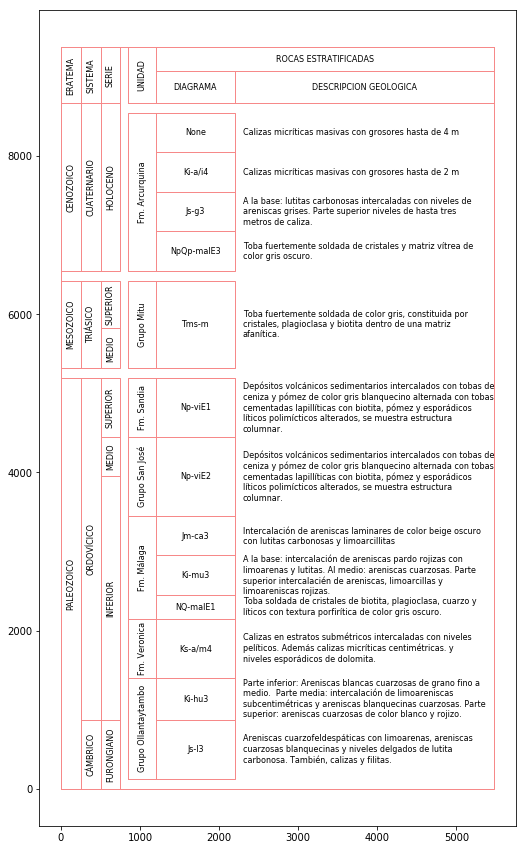

In [33]:
plt.plot(*polygons_plot, linewidth=1, color="#F68989")
for i in annotation_plot:
    # plt.annotate(s=i['nombre'], xy=[i['x'], i['y']], horizontalalignment=i['horizontalalignment'], verticalalignment='center', fontsize=8, rotation=i['rotation'], wrap=True)
    plt.text(i['x'], i['y'], i['nombre'], ha=i['horizontalalignment'], va='center', fontsize=8, rotation=i['rotation'], wrap=True)

plt.axis('scaled')
plt._get_wrap_line_width = 10
plt.show()

In [113]:
polygons_plot[0]

array('d', [1200.0, 1200.0, 2200.0, 2200.0, 1200.0])

In [57]:
df_annotation_plot = pd.DataFrame(annotation_plot)

In [58]:
df_annotation_plot

,etiqueta,horizontalalignment,nombre,rotation,tipo,x,y
0,NaN,center,Js-l3,0,5,1700.0,500.0
1,NaN,center,Ki-hu3,0,5,1700.0,1137.5
2,NaN,center,Ks-a/m4,0,5,1700.0,1775.0
3,NaN,center,NQ-malE1,0,5,1700.0,2300.0
4,NaN,center,Ki-mu3,0,5,1700.0,2700.0
5,NaN,center,Jm-ca3,0,5,1700.0,3200.0
6,NaN,center,Np-viE2,0,5,1700.0,3950.0
7,NaN,center,Np-viE1,0,5,1700.0,4825.0
8,NaN,center,Tms-m,0,5,1700.0,5875.0
9,NaN,center,NpQp-malE3,0,5,1700.0,6800.0


In [70]:
annotation_plot[0]

{'horizontalalignment': 'center',
 'nombre': u'Js-l3',
 'rotation': 0,
 'x': 1700.0,
 'y': 500.0}

In [34]:
df_diagrama_arr = pd.DataFrame(diagrama_arr)
diagrama_arr[0]

{'codi': 2907L,
 'height': 750L,
 'nombre': u'Js-l3',
 'polygon': <shapely.geometry.polygon.Polygon at 0x2f358910>,
 'tipo': 5,
 'y_max': 875L}

In [40]:
df_diagrama_arr

,codi,height,nombre,polygon,tipo,y_max
0,2907,750,Js-l3,"POLYGON ((1200 125, 1200 875, 2200 875, 2200 1...",5,875
1,2491,525,Ki-hu3,"POLYGON ((1200 875, 1200 1400, 2200 1400, 2200...",5,1400
2,2480,750,Ks-a/m4,"POLYGON ((1200 1400, 1200 2150, 2200 2150, 220...",5,2150
3,687,300,NQ-malE1,"POLYGON ((1200 2150, 1200 2450, 2200 2450, 220...",5,2450
4,2501,500,Ki-mu3,"POLYGON ((1200 2450, 1200 2950, 2200 2950, 220...",5,2950
5,2941,500,Jm-ca3,"POLYGON ((1200 2950, 1200 3450, 2200 3450, 220...",5,3450
6,2481,500,Np-viE2,"POLYGON ((1200 3450, 1200 3950, 1200 4450, 220...",5,3950
7,789,750,Np-viE1,"POLYGON ((1200 4450, 1200 5200, 2200 5200, 220...",5,5200
8,688,500,Tms-m,"POLYGON ((1200 5325, 1200 5825, 1200 6425, 220...",5,5825
9,689,500,NpQp-malE3,"POLYGON ((1200 6550, 1200 7050, 2200 7050, 220...",5,7050


In [37]:
df_diagrama_arr['polygon'][0].boundary.__geo_interface__

{'coordinates': ((1200.0, 125.0),
  (1200.0, 875.0),
  (2200.0, 875.0),
  (2200.0, 125.0),
  (1200.0, 125.0)),
 'type': 'LineString'}

In [64]:
df_diagrama_arr['polygon'][0].bounds

(1200.0, 125.0, 2200.0, 875.0)

In [61]:
# Son todos los diagramas del poligono
print(dir(df_diagrama_arr['polygon'][0]))

['__and__', '__array_interface__', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__geo_interface__', '__geom__', '__getattribute__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__or__', '__p__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '__xor__', '_crs', '_ctypes_data', '_exterior', '_geom', '_get_coords', '_interiors', '_is_empty', '_lgeos', '_ndim', '_other_owned', '_repr_svg_', '_set_coords', 'almost_equals', 'area', 'array_interface_base', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'convex_hull', 'coords', 'covers', 'crosses', 'ctypes', 'difference', 'disjoint', 'distance', 'empty', 'envelope', 'equals', 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'impl', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_s

In [60]:
df_leyenda[df_leyenda['CODI'] == df_diagrama_arr.iloc[0]['codi']].iloc[0]['CODHOJA']

u'29r4'

In [78]:
df_auxiliares_arr= pd.DataFrame(auxiliares_arr)
diagrama_arr[0]

{'codi': 2907L,
 'height': 750L,
 'nombre': u'Js-l3',
 'polygon': <shapely.geometry.polygon.Polygon at 0x2c84c370>,
 'tipo': 5,
 'y_max': 875L}

In [79]:
# Son todas las lineas acuxiliares
df_auxiliares_arr

,nombre,polygon,tipo
0,ERATEMA,"POLYGON ((0 8675, 0 9375, 250 9375, 250 8675, ...",7
1,SISTEMA,"POLYGON ((250 8675, 250 9375, 500 9375, 500 86...",8
2,SERIE,"POLYGON ((500 8675, 500 9375, 750 9375, 750 86...",9
3,UNIDAD,"POLYGON ((850 8675, 850 9375, 1200 9375, 1200 ...",10
4,ROCAS ESTRATIFICADAS,"POLYGON ((1200 9075, 1200 9375, 5475 9375, 547...",13
5,DIAGRAMA,"POLYGON ((1200 8675, 1200 9075, 2200 9075, 220...",11
6,DESCRIPCION GEOLOGICA,"POLYGON ((2200 8675, 2200 9075, 5475 9075, 547...",12
7,,"POLYGON ((0 0, 0 9375, 5475 9375, 5475 0, 0 0))",16


['__and__', '__array_interface__', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__geo_interface__', '__geom__', '__getattribute__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__or__', '__p__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '__xor__', '_crs', '_ctypes_data', '_exterior', '_geom', '_get_coords', '_interiors', '_is_empty', '_lgeos', '_ndim', '_other_owned', '_repr_svg_', '_set_coords', 'almost_equals', 'area', 'array_interface_base', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'convex_hull', 'coords', 'covers', 'crosses', 'ctypes', 'difference', 'disjoint', 'distance', 'empty', 'envelope', 'equals', 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'impl', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_s

In [52]:
auxiliares_arr[0]['polygon'].boundary.__geo_interface__

{'coordinates': ((0.0, 8675.0),
  (0.0, 9375.0),
  (250.0, 9375.0),
  (250.0, 8675.0),
  (0.0, 8675.0)),
 'type': 'LineString'}

In [61]:
a= {'features': [{'geometry': {'rings': (((1200.0, 125.0), (1200.0, 875.0), (2200.0, 875.0), (2200.0, 125.0), (1200.0, 125.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2907L, 'ETIQUETA': u'Js-l3', 'DESCRIP': u'Areniscas cuarzofeldesp\xe1ticas con limoarenas, areniscas cuarzosas blanquecinas y niveles delgados de lutita carbonosa. Tambi\xe9n, calizas y filitas.', 'ESTADO': 1, 'UNIDAD': u'Grupo Ollantaytambo'}}, {'geometry': {'rings': (((1200.0, 875.0), (1200.0, 1400.0), (2200.0, 1400.0), (2200.0, 875.0), (1200.0, 875.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2491L, 'ETIQUETA': u'Ki-hu3', 'DESCRIP': u'Parte inferior: Areniscas blancas cuarzosas de grano fino a medio.  Parte media: intercalaci\xf3n de limoareniscas subcentim\xe9tricas y areniscas blanquecinas cuarzosas. Parte superior: areniscas cuarzosas de color blanco y 
rojizo.', 'ESTADO': 1, 'UNIDAD': u'Grupo Ollantaytambo'}}, {'geometry': {'rings': (((1200.0, 1400.0), (1200.0, 2150.0), (2200.0, 2150.0), (2200.0, 1400.0), (1200.0, 1400.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': 
'29r4', 'CODI': 2480L, 'ETIQUETA': u'Ks-a/m4', 'DESCRIP': u'Calizas en estratos subm\xe9tricos intercaladas con niveles pel\xedticos. Adem\xe1s calizas micr\xedticas centim\xe9tricas. y niveles espor\xe1dicos de dolomita.', 'ESTADO': 1, 'UNIDAD': u'Fm. Veronica'}}, {'geometry': {'rings': (((1200.0, 2150.0), (1200.0, 2450.0), (2200.0, 2450.0), (2200.0, 2150.0), (1200.0, 2150.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 687L, 'ETIQUETA': u'NQ-malE1', 'DESCRIP': u'Toba soldada de cristales de biotita, plagioclasa, cuarzo y  l\xedticos con textura porfir\xedtica de color gris oscuro.', 'ESTADO': 1, 'UNIDAD': u'Fm. M\xe1laga'}}, {'geometry': {'rings': (((1200.0, 2450.0), (1200.0, 2950.0), (2200.0, 2950.0), (2200.0, 2450.0), (1200.0, 2450.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2501L, 'ETIQUETA': u'Ki-mu3', 'DESCRIP': u'A la base: intercalaci\xf3n de areniscas pardo rojizas con limoarenas y lutitas. Al medio: areniscas cuarzosas. Parte superior intercalaci\xe9n de areniscas, limoarcillas y limoareniscas rojizas.', 'ESTADO': 1, 'UNIDAD': u'Fm. M\xe1laga'}}, {'geometry': {'rings': (((1200.0, 2950.0), (1200.0, 3450.0), (2200.0, 3450.0), (2200.0, 2950.0), (1200.0, 2950.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2941L, 'ETIQUETA': u'Jm-ca3', 'DESCRIP': u'Intercalaci\xf3n de areniscas laminares de color beige oscuro con lutitas carbonosas y limoarcillitas', 'ESTADO': 1, 'UNIDAD': u'Fm. M\xe1laga'}}, {'geometry': {'rings': (((1200.0, 3450.0), (1200.0, 3950.0), (1200.0, 4450.0), (2200.0, 4450.0), (2200.0, 3950.0), (2200.0, 3450.0), (1200.0, 3450.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2481L, 'ETIQUETA': u'Np-viE2', 'DESCRIP': u'Dep\xf3sitos volc\xe1nicos sedimentarios intercalados con tobas de ceniza y p\xf3mez de color gris blanquecino alternada con tobas cementadas lapill\xedticas con biotita, p\xf3mez y espor\xe1dicos l\xedticos polim\xedcticos alterados, se muestra estructura columnar.', 'ESTADO': 1, 'UNIDAD': u'Grupo San Jos\xe9'}}, {'geometry': {'rings': (((1200.0, 4450.0), (1200.0, 5200.0), (2200.0, 5200.0), (2200.0, 4450.0), (1200.0, 4450.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 789L, 'ETIQUETA': u'Np-viE1', 'DESCRIP': u'Dep\xf3sitos volc\xe1nicos sedimentarios intercalados con tobas de ceniza y p\xf3mez de color gris blanquecino alternada con tobas cementadas lapill\xedticas con biotita, p\xf3mez y espor\xe1dicos l\xedticos polim\xedcticos alterados, se muestra estructura columnar.', 'ESTADO': 1, 'UNIDAD': u'Fm. Sandia'}}, {'geometry': {'rings': (((1200.0, 5325.0), (1200.0, 5825.0), (1200.0, 6425.0), (2200.0, 6425.0), (2200.0, 5825.0), (2200.0, 5325.0), (1200.0, 5325.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 688L, 'ETIQUETA': u'Tms-m', 'DESCRIP': u'Toba fuertemente soldada de color gris, constituida por cristales, plagioclasa y biotita dentro de una matriz afan\xedtica.', 'ESTADO': 1, 'UNIDAD': u'Grupo Mitu'}}, {'geometry': {'rings': (((1200.0, 6550.0), (1200.0, 7050.0), (2200.0, 7050.0), (2200.0, 6550.0), (1200.0, 6550.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 689L, 'ETIQUETA': u'NpQp-malE3', 'DESCRIP': u'Toba fuertemente soldada de cristales y matriz v\xedtrea de color gris oscuro.', 'ESTADO': 1, 'UNIDAD': u'Fm. Arcurquina'}}, {'geometry': {'rings': (((1200.0, 7050.0), (1200.0, 7550.0), (2200.0, 7550.0), (2200.0, 7050.0), (1200.0, 7050.0)),)}, 'attributes': {'TIPO': 
'1', 'CODHOJA': '29r4', 'CODI': 2905L, 'ETIQUETA': u'Js-g3', 'DESCRIP': u'A la base: lutitas carbonosas intercaladas con niveles de areniscas grises. Parte superior niveles de hasta tres metros de caliza.', 'ESTADO': 
1, 'UNIDAD': u'Fm. Arcurquina'}}, {'geometry': {'rings': (((1200.0, 7550.0), (1200.0, 8050.0), (2200.0, 8050.0), (2200.0, 7550.0), (1200.0, 7550.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 2479L, 'ETIQUETA': u'Ki-a/i4', 'DESCRIP': u'Calizas micr\xedticas masivas con grosores hasta de 2 m', 'ESTADO': 1, 'UNIDAD': u'Fm. Arcurquina'}}, {'geometry': {'rings': (((1200.0, 8050.0), (1200.0, 8550.0), (2200.0, 8550.0), (2200.0, 8050.0), (1200.0, 8050.0)),)}, 'attributes': {'TIPO': '1', 'CODHOJA': '29r4', 'CODI': 3552L, 'ETIQUETA': None, 'DESCRIP': u'Calizas micr\xedticas masivas con grosores hasta de 4 m', 'ESTADO': 1, 'UNIDAD': u'Fm. Arcurquina'}}], 'fieldAliases': {'TIPO': 'Tipo', 'CODHOJA': 'CODHOJA', 'CODI': 'CODI', 'ETIQUETA': 'ETIQUETA', 'DESCRIP': 'Descripci\xc3\xb3n', 'ESTADO': 'ESTADO', 'UNIDAD': 'UNIDAD'}, 'fields': [{'alias': 'CODI', 'type': 'esriFieldTypeInteger', 'name': 'CODI'}, {'alias': 'ETIQUETA', 'length': 20, 'type': 'esriFieldTypeString', 'name': 'ETIQUETA'}, {'alias': 'UNIDAD', 'length': 50, 'type': 'esriFieldTypeString', 'name': 'UNIDAD'}, {'alias': 'Descripci\xc3\xb3n', 'length': 500, 'type': 'esriFieldTypeString', 'name': 'DESCRIP'}, {'alias': 'Tipo', 'length': 50, 'type': 'esriFieldTypeString', 'name': 'TIPO'}, {'alias': 'CODHOJA', 'length': 5, 'type': 'esriFieldTypeString', 'name': 'CODHOJA'}, {'alias': 'ESTADO', 'type': 'esriFieldTypeSmallInteger', 'name': 'ESTADO'}], 'displayFieldName': '', 'spatialReference': {'wkid': 32718, 'latestWkid': 32718}, 'geometryType': 'esriGeometryPolygon'}

SyntaxError: EOL while scanning string literal (<ipython-input-61-fb473277df95>, line 1)

In [62]:
import automapic_template_json as auttmp

In [64]:
auttmp._PO_LEYENDA_TEMPLATE_MG['features'] = []

for diagram in diagrama_arr:
    diagram_data = df_leyenda[df_leyenda["CODI"] == diagram['codi']].iloc[0]
    diagram_json = diagram['polygon'].__geo_interface__['coordinates']
    data = {
        "attributes": {
            "CODI": diagram['codi'],
            "ETIQUETA": diagram['nombre'],
            "UNIDAD": diagram_data["UNIDAD"],
            "DESCRIP": diagram_data["DESCRIP"],
            # "SERIE": diagram_data[_TB_LEYENDA.serie],
            "TIPO": '',
            # "EDAD": diagram_data[_TB_LEYENDA.edad],
            # "ORDEN": diagram_data[_TB_LEYENDA.orden],
            # "GROSOR_M": diagram_data[_TB_LEYENDA.grosor_m],
            # "GROSOR_I": diagram_data[_TB_LEYENDA.grosor_i],
            # "GROSOR_U": diagram_data[_TB_LEYENDA.grosor_u],
            "CODHOJA": codhoja,
            # "SEP": diagram_data[_TB_LEYENDA.separador],
            "ESTADO": 1
        },
        "geometry": {
            "rings": diagram_json
        }
    }
    auttmp._PO_LEYENDA_TEMPLATE_MG['features'].append(data)

print(json.dumps(auttmp._PO_LEYENDA_TEMPLATE_MG))
# gpo_form = model.gpo_mg_form()
# # print(json.dumps(auttmp._PO_LEYENDA_TEMPLATE_MG))
# rows_diagram = arcpy.AsShape(json.dumps(auttmp._PO_LEYENDA_TEMPLATE_MG), True)
# gpo_diagram_mfl = arcpy.MakeFeatureLayer_management(gpo_form.path, 'gpl_seccion_path_{}'.format(codhoja), query)
# arcpy.DeleteRows_management(gpo_diagram_mfl)
# arcpy.Append_management(rows_diagram, gpo_diagram_mfl, "NO_TEST")

{"features": [{"geometry": {"rings": [[[1200.0, 125.0], [1200.0, 875.0], [2200.0, 875.0], [2200.0, 125.0], [1200.0, 125.0]]]}, "attributes": {"TIPO": "", "CODHOJA": "29r4", "CODI": 2907, "ETIQUETA": "Js-l3", "DESCRIP": "Areniscas cuarzofeldesp\u00e1ticas con limoarenas, areniscas cuarzosas blanquecinas y niveles delgados de lutita carbonosa. Tambi\u00e9n, calizas y filitas.", "ESTADO": 1, "UNIDAD": "Grupo Ollantaytambo"}}, {"geometry": {"rings": [[[1200.0, 875.0], [1200.0, 1400.0], [2200.0, 1400.0], [2200.0, 875.0], [1200.0, 875.0]]]}, "attributes": {"TIPO": "", "CODHOJA": "29r4", "CODI": 2491, "ETIQUETA": "Ki-hu3", "DESCRIP": "Parte inferior: Areniscas blancas cuarzosas de grano fino a medio.  Parte media: intercalaci\u00f3n de limoareniscas subcentim\u00e9tricas y areniscas blanquecinas cuarzosas. Parte superior: areniscas cuarzosas de color blanco y rojizo.", "ESTADO": 1, "UNIDAD": "Grupo Ollantaytambo"}}, {"geometry": {"rings": [[[1200.0, 1400.0], [1200.0, 2150.0], [2200.0, 2150.0]

In [38]:
print(unidad_arr[0])
print(serie_arr[0])
print(sistema_arr[0])
print(eratema_arr[0])
print(auxiliares_arr[0])

{'nombre': u'Grupo Ollantaytambo', 'polygon': <shapely.geometry.polygon.Polygon object at 0x2F27EEF0>, 'tipo': 4}
{'id_edad': u'1114', 'polygon': <shapely.geometry.polygon.Polygon object at 0x2F27EE70>, 'tipo': 3, 'nombre': u'FURONGIANO'}
{'id_edad': u'133', 'polygon': <shapely.geometry.polygon.Polygon object at 0x03F848D0>, 'tipo': 2, 'nombre': u'CUATERNARIO'}
{'id_edad': u'11', 'polygon': <shapely.geometry.polygon.Polygon object at 0x2F358310>, 'tipo': 1, 'nombre': u'PALEOZOICO'}
{'nombre': 'ERATEMA', 'polygon': <shapely.geometry.polygon.Polygon object at 0x2F36A8D0>, 'tipo': 7}


In [39]:
a = list()
a.extend(unidad_arr)
a.extend(serie_arr)
a.extend(sistema_arr)
a.extend(eratema_arr)
a.extend(auxiliares_arr)


In [40]:
df_m = pd.DataFrame(a)

In [48]:
l = map(lambda i: i.keys(), a)
b = set.intersection(*map(set, l))

In [51]:
df_m[list(b)].head()

,nombre,polygon,tipo
0,Grupo Ollantaytambo,"POLYGON ((850 125, 850 1400, 1200 1400, 1200 1...",4
1,Fm. Veronica,"POLYGON ((850 1400, 850 2150, 1200 2150, 1200 ...",4
2,Fm. Málaga,"POLYGON ((850 2150, 850 3450, 1200 3450, 1200 ...",4
3,Grupo San José,"POLYGON ((850 3450, 850 4450, 1200 4450, 1200 ...",4
4,Fm. Sandia,"POLYGON ((850 4450, 850 5200, 1200 5200, 1200 ...",4


In [55]:
codhoja[:-1], codhoja

('29r', '29r4')

In [56]:
df_annotation_plot

NameError: name 'df_annotation_plot' is not defined